<a href="https://colab.research.google.com/github/YousefBarty/ML-Projects/blob/main/Multi_Algorithms_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron , SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# dict to save the name of each algorthim and there accuracy
re={}

# Reading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/breast_cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data preprocessing

In [ ]:
df = df.drop('Unnamed: 32', axis=1)
X = df.drop(['id','diagnosis'],axis=1)
y = df.iloc[:,1]

In [ ]:
X.shape

(569, 30)

In [ ]:
# Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
# https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3)

# Decision Tree

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [ ]:
dt=DecisionTreeClassifier(max_depth=9)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['Decision Tree']=(accuracy_score(y_test, y_pred) * 100)

93.56725146198829


[Text(0.555, 0.9285714285714286, 'X[22] <= 106.1\ngini = 0.467\nsamples = 398\nvalue = [250, 148]'),
 Text(0.37, 0.7857142857142857, 'X[27] <= 0.159\ngini = 0.106\nsamples = 249\nvalue = [235, 14]'),
 Text(0.26, 0.6428571428571429, 'X[27] <= 0.135\ngini = 0.056\nsamples = 241\nvalue = [234, 7]'),
 Text(0.16, 0.5, 'X[13] <= 48.975\ngini = 0.026\nsamples = 228\nvalue = [225, 3]'),
 Text(0.08, 0.35714285714285715, 'X[21] <= 33.35\ngini = 0.009\nsamples = 225\nvalue = [224, 1]'),
 Text(0.04, 0.21428571428571427, 'gini = 0.0\nsamples = 211\nvalue = [211, 0]'),
 Text(0.12, 0.21428571428571427, 'X[27] <= 0.09\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.08, 0.07142857142857142, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.16, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.24, 0.35714285714285715, 'X[28] <= 0.208\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.28, 0.2

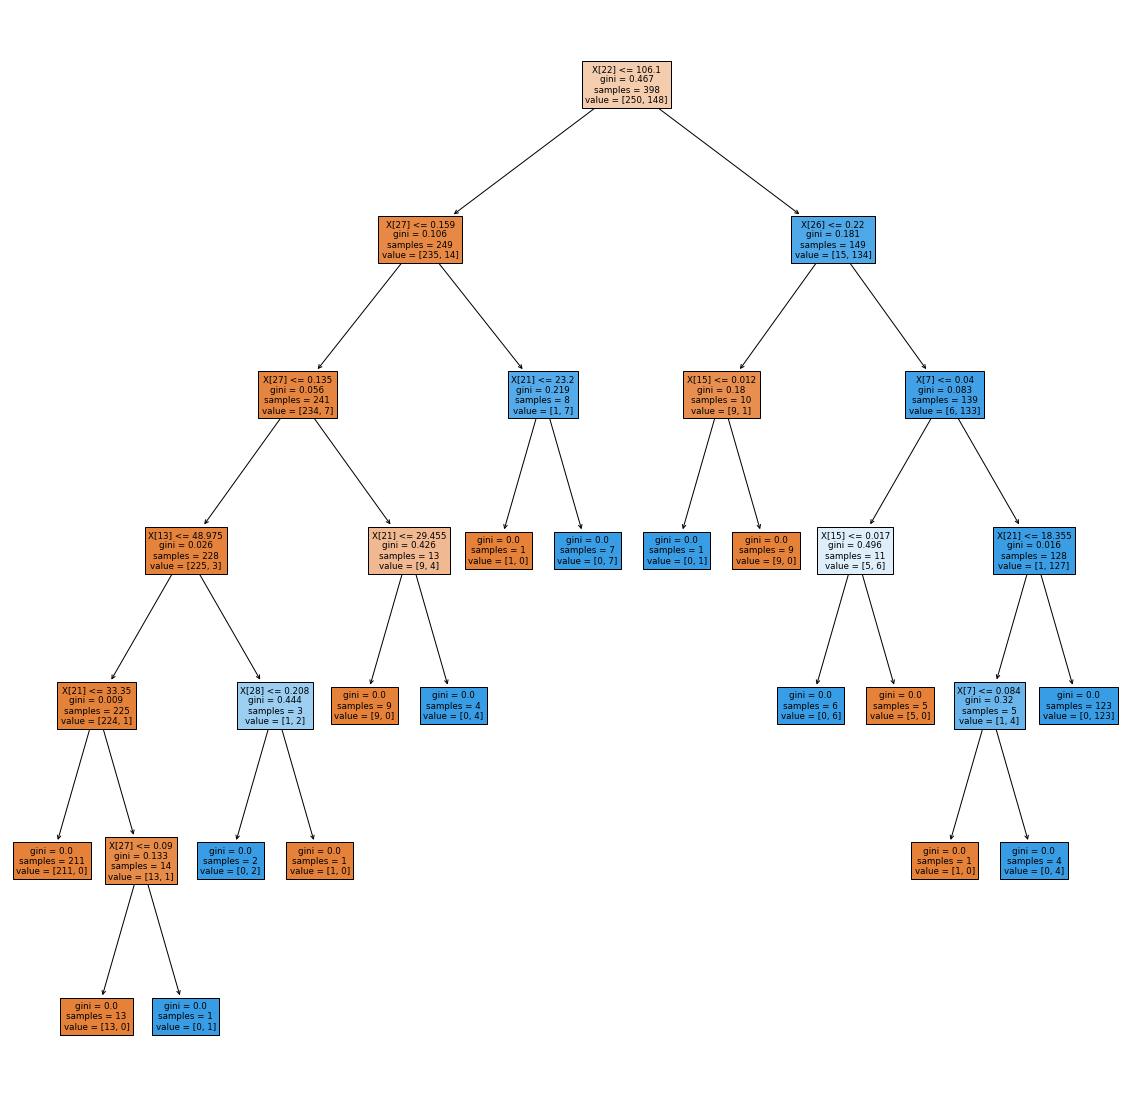

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(20,20)) # Resize figure
tree.plot_tree(dt, filled=True, ax=ax)

# Random Forest

In [ ]:
rnc=RandomForestClassifier(n_estimators=15,max_depth=5)
rnc.fit(X_train,y_train)
y_pred_T = rnc.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['Random Forest']=(accuracy_score(y_test, y_pred_T) * 100)

93.56725146198829


# Data Processing Using << Min Max Scaler >>

###### Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Examples of such algorithm families include:

* linear and logistic regression
* nearest neighbors
* neural networks
* support vector machines with radial bias kernel functions
* principal components analysis
* linear discriminant analysis

In [ ]:
# https://www.youtube.com/watch?v=31_JLKI8xPQ&list=PL6-3IRz2XF5X_9JeJh1xeciAbkijvc09k&index=10
# normalization (طرح القيمه ناقص المتوسط مقسومه علي المدي( اكبر قيمه واصغر قيمه ) علشان الداتا كلها تكون في رينج 0 و 1 )
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=Use%20MinMaxScaler%20if%20you%20want,sample%20rows%2C%20not%20feature%20columns.

scaler = MinMaxScaler() # default range (0,1)
scaler.fit(X_train) # Compute the minimum and maximum to be used for later scaling.
X_train_sc = scaler.transform(X_train) # Fit to data, then transform it.

In [ ]:
# Use the same object to normalize Test data
X_test=scaler.transform(X_test)

# Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_sc,y_train)
y_pred = clf.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['Logistic Regression']=(accuracy_score(y_test, y_pred) * 100)

96.49122807017544


# KNeighbors

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_sc,y_train)
y_pred = knn.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['KNeighbors']=(accuracy_score(y_test, y_pred) * 100)

96.49122807017544


# Perceptron

In [ ]:
p=Perceptron(eta0=0.001,max_iter=1000)
p.fit(X_train_sc,y_train)
y_pred = p.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['Perceptron']=(accuracy_score(y_test, y_pred) * 100)

61.98830409356725


# Adaline 

In [ ]:
ad=SGDClassifier(max_iter=100,eta0=0.001)
ad.fit(X_train_sc,y_train)
y_pred = ad.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['Adaline']=(accuracy_score(y_test, y_pred) * 100)

98.24561403508771


# SVM

In [ ]:
svc=SVC(kernel='linear',C=1)
svc.fit(X_train_sc,y_train)
y_pred = svc.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['SVM']=(accuracy_score(y_test, y_pred) * 100)

98.24561403508771


# Final Result

In [ ]:
for key,value in re.items():
  print (key," ",value.round(2))

Decision Tree   90.64
Random Forest   96.49
Logistic Regression   96.49
KNeighbors   96.49
Perceptron   61.99
Adaline   98.25
SVM   98.25


# Data Processing Using << Standard Scaler >>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # default range (0,1)
scaler.fit(X_train) # Compute the minimum and maximum to be used for later scaling.
X_train_sc = scaler.transform(X_train) # Fit to data, then transform it.
X_test=scaler.transform(X_test)

# Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_sc,y_train)
y_pred = clf.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['Logistic Regression']=(accuracy_score(y_test, y_pred) * 100)

97.6608187134503


# KNeighbors

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_sc,y_train)
y_pred = knn.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['KNeighbors']=(accuracy_score(y_test, y_pred) * 100)

95.32163742690058


# Perceptron

In [ ]:
p=Perceptron(eta0=0.001,max_iter=1000)
p.fit(X_train_sc,y_train)
y_pred = p.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['Perceptron']=(accuracy_score(y_test, y_pred) * 100)

94.73684210526315


# Adaline

In [ ]:
ad=SGDClassifier(max_iter=100,eta0=0.001)
ad.fit(X_train_sc,y_train)
y_pred = ad.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['Adaline']=(accuracy_score(y_test, y_pred) * 100)

96.49122807017544


# SVM

In [ ]:
svc=SVC(kernel='linear',C=1)
svc.fit(X_train_sc,y_train)
y_pred = svc.predict(X_test)
print((accuracy_score(y_test, y_pred) * 100))
re['SVM']=(accuracy_score(y_test, y_pred) * 100)

98.24561403508771


# Final Result

In [ ]:
for key,value in re.items():
  print (key," ",value.round(2))

Decision Tree   90.64
Random Forest   96.49
Logistic Regression   97.66
KNeighbors   95.32
Perceptron   94.74
Adaline   96.49
SVM   98.25
